<a href="https://colab.research.google.com/github/pillwood/Heart-Disease-Prediction/blob/Pre-ProcessingData/BigData_P201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 설치

In [60]:
install.packages("tidyverse")
library(tidyverse)
install.packages("data.table")
library(data.table)
install.packages("caret")
library(caret)

install.packages("psych")
library(psych)
install.packages("pastecs")
library(pastecs)

install.packages("ggthemes")
library(ggthemes)

install.packages("extrafont")
library(extrafont)

install.packages("GGally")
library(GGally)

install.packages("PerformanceAnalytics")
install.packages("corrr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Data : raw_merged_heart_dataset.csv

In [61]:
#https://drive.google.com/file/d/1mK4aKnRilDPq3TA71xFhCAzKVdTTLAJ2/view?usp=sharing
system("gdown --id 1mK4aKnRilDPq3TA71xFhCAzKVdTTLAJ2")
system("ls", TRUE)
TB <- fread("/content/raw_merged_heart_dataset.csv",header = T, encoding = "UTF-8") %>% as_tibble()
TB %>% show()

[1] "raw_merged_heart_dataset.csv" "sample_data"

# A tibble: 2,181 × 14
     age   sex    cp trestbps chol  fbs   restecg thalachh exang oldpeak slope
   <int> <int> <int> <chr>    <chr> <chr> <chr>   <chr>    <chr>   <dbl> <chr>
 1    63     1     3 145      233   1     0       150      0         2.3 0    
 2    37     1     2 130      250   0     1       187      0         3.5 0    
 3    41     0     1 130      204   0     0       172      0         1.4 2    
 4    56     1     1 120      236   0     1       178      0         0.8 2    
 5    57     0     0 120      354   0     1       163      1         0.6 2    
 6    57     1     0 140      192   0     1       148      0         0.4 1    
 7    56     0     1 140      294   0     0       153      0         1.3 1    
 8    44     1     1 120      263   0     1       173      0         0   2    
 9    52     1     2 172      199   1     1       162      0         0.5 2    
10    57     1     2 150      168   0     1       174      0         1.6 2    
# ℹ 2,171 more rows
# ℹ 3 mor

### 결측값 NA처리

In [91]:
#? 혹은 ?가 있는 데이터에 대해 NA로 바꾼 후 numeric으로 변환
TB_no_qm <- TB %>%
  mutate(across(everything(), ~ gsub("\\?", NA, as.character(.)))) %>%
  mutate(across(where(~ all(!is.na(as.numeric(.)))), as.numeric))

In [92]:
cat("NA포함 행수 : ", table(is.na(TB_no_qm)),"\n")

NA포함 행수 :  29752 782 


In [93]:
TB_no_qmna <- na.omit(TB_no_qm)

In [94]:
TB_no_qmna <- TB_no_qmna %>%
  mutate(across(everything(), ~ as.numeric(.)))

In [95]:
TB_no_qmna %>% show()

# A tibble: 1,888 × 14
     age   sex    cp trestbps  chol   fbs restecg thalachh exang oldpeak slope
   <dbl> <dbl> <dbl>    <dbl> <dbl> <dbl>   <dbl>    <dbl> <dbl>   <dbl> <dbl>
 1    63     1     3      145   233     1       0      150     0     2.3     0
 2    37     1     2      130   250     0       1      187     0     3.5     0
 3    41     0     1      130   204     0       0      172     0     1.4     2
 4    56     1     1      120   236     0       1      178     0     0.8     2
 5    57     0     0      120   354     0       1      163     1     0.6     2
 6    57     1     0      140   192     0       1      148     0     0.4     1
 7    56     0     1      140   294     0       0      153     0     1.3     1
 8    44     1     1      120   263     0       1      173     0     0       2
 9    52     1     2      172   199     1       1      162     0     0.5     2
10    57     1     2      150   168     0       1      174     0     1.6     2
# ℹ 1,878 more rows
# ℹ 3 mor

### 이상값 처리

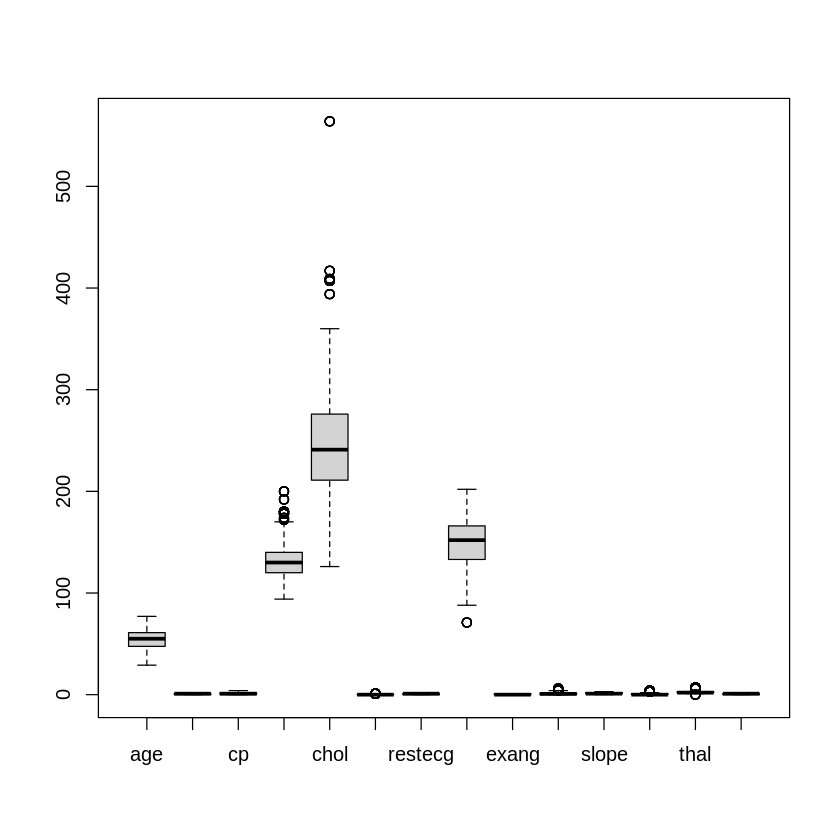

In [82]:
#전체 데이터에 대해 실행
TB_no_qmna %>% boxplot()

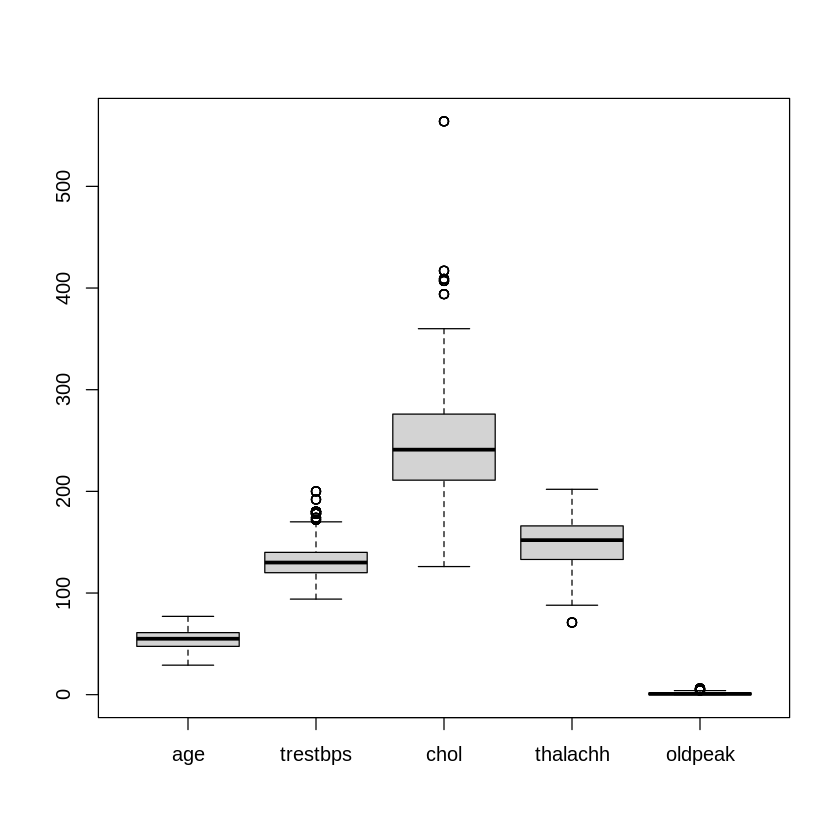

In [81]:
 #연속형만 선택.
TB_no_qmna %>% select(age, trestbps, chol, thalachh, oldpeak) %>% boxplot()

In [96]:
#IQR을 위한 is_outlier
is_outlier <- function(x) {
  return( x < summary(x)[2] - 1.5 * IQR(x) | x > summary(x)[5] + 1.5 * IQR(x) )
}

#age, trestbps, chol, thalachh, oldpeak에 대한 이상값을 NA로 변경
TB_IQR <- TB_no_qmna %>%
  mutate(across(c(age, trestbps, chol, thalachh, oldpeak),
  ~ ifelse(is_outlier(.), NA, .)))

In [97]:
cat("NA포함 행수 : ", table(is.na(TB_IQR)),"\n")

NA포함 행수 :  26307 125 


In [98]:
#NA값을 제거한 TB_PP
TB_PP <- na.omit(TB_IQR)
TB_PP %>% show()

# A tibble: 1,769 × 14
     age   sex    cp trestbps  chol   fbs restecg thalachh exang oldpeak slope
   <dbl> <dbl> <dbl>    <dbl> <dbl> <dbl>   <dbl>    <dbl> <dbl>   <dbl> <dbl>
 1    63     1     3      145   233     1       0      150     0     2.3     0
 2    37     1     2      130   250     0       1      187     0     3.5     0
 3    41     0     1      130   204     0       0      172     0     1.4     2
 4    56     1     1      120   236     0       1      178     0     0.8     2
 5    57     0     0      120   354     0       1      163     1     0.6     2
 6    57     1     0      140   192     0       1      148     0     0.4     1
 7    56     0     1      140   294     0       0      153     0     1.3     1
 8    44     1     1      120   263     0       1      173     0     0       2
 9    57     1     2      150   168     0       1      174     0     1.6     2
10    54     1     0      140   239     0       1      160     0     1.2     2
# ℹ 1,759 more rows
# ℹ 3 mor

### 상관관계 분석

In [100]:
TB_cor <- TB_PP %>% cor() %>% round(4)
TB_cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
age,1.0000,-0.0743,-0.0342,0.2683,0.1895,0.1062,-0.0622,-0.4082,0.0927,0.2086,-0.1115,0.2997,0.0477,-0.1621
sex,-0.0743,1.0000,-0.0533,0.0014,-0.1290,0.0564,-0.0371,-0.0514,0.1879,0.1530,-0.0386,0.1418,0.1928,-0.2206
cp,-0.0342,-0.0533,1.0000,0.0482,-0.0433,0.0445,0.2252,0.1674,-0.2326,-0.0785,0.1289,-0.0959,0.3812,0.2814
trestbps,0.2683,0.0014,0.0482,1.0000,0.1260,0.1140,-0.0771,-0.0609,-0.0042,0.1359,-0.0545,0.1001,0.0085,-0.0729
chol,0.1895,-0.1290,-0.0433,0.1260,1.0000,0.0296,-0.0689,-0.0396,0.0881,0.0012,0.0162,0.0727,0.0583,-0.0893
fbs,0.1062,0.0564,0.0445,0.1140,0.0296,1.0000,-0.0512,-0.0173,0.0152,0.0074,-0.0516,0.1386,-0.0249,-0.0329
restecg,-0.0622,-0.0371,0.2252,-0.0771,-0.0689,-0.0512,1.0000,0.0483,-0.0484,-0.0430,0.1380,-0.0423,0.1804,0.1468
thalachh,-0.4082,-0.0514,0.1674,-0.0609,-0.0396,-0.0173,0.0483,1.0000,-0.3932,-0.3492,0.2724,-0.2440,-0.1177,0.2997
exang,0.0927,0.1879,-0.2326,-0.0042,0.0881,0.0152,-0.0484,-0.3932,1.0000,0.3289,-0.1915,0.1244,0.1606,-0.3134
oldpeak,0.2086,0.1530,-0.0785,0.1359,0.0012,0.0074,-0.0430,-0.3492,0.3289,1.0000,-0.3724,0.1683,0.1472,-0.3199


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


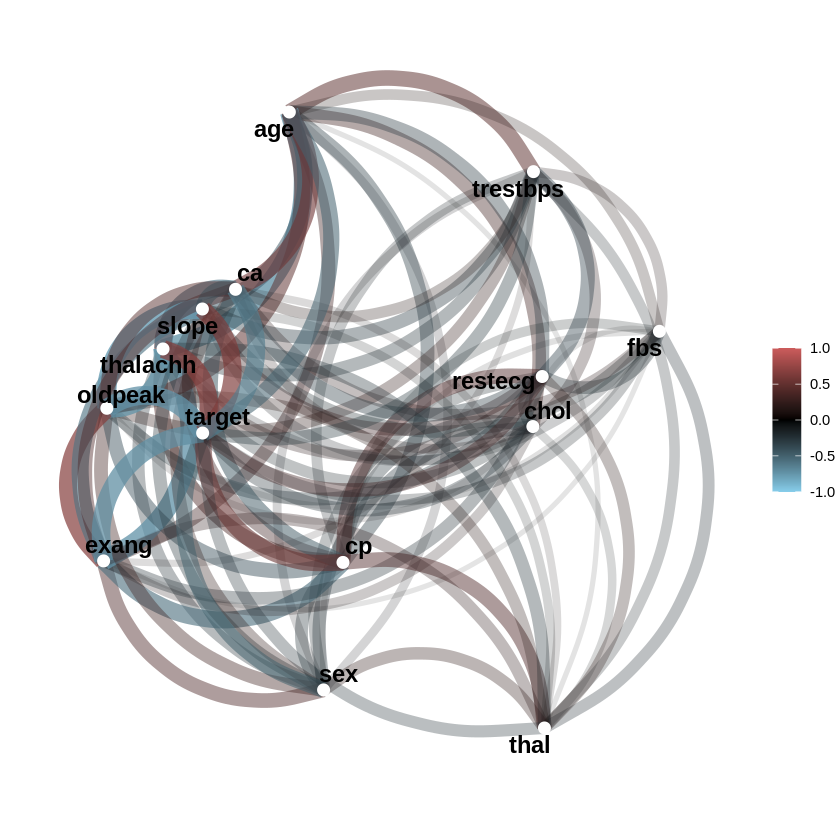

In [101]:
TB_cor %>%
  corrr::correlate() %>%
  corrr::network_plot(min_cor=0, colours=c("skyblue", "black", "indianred"))

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

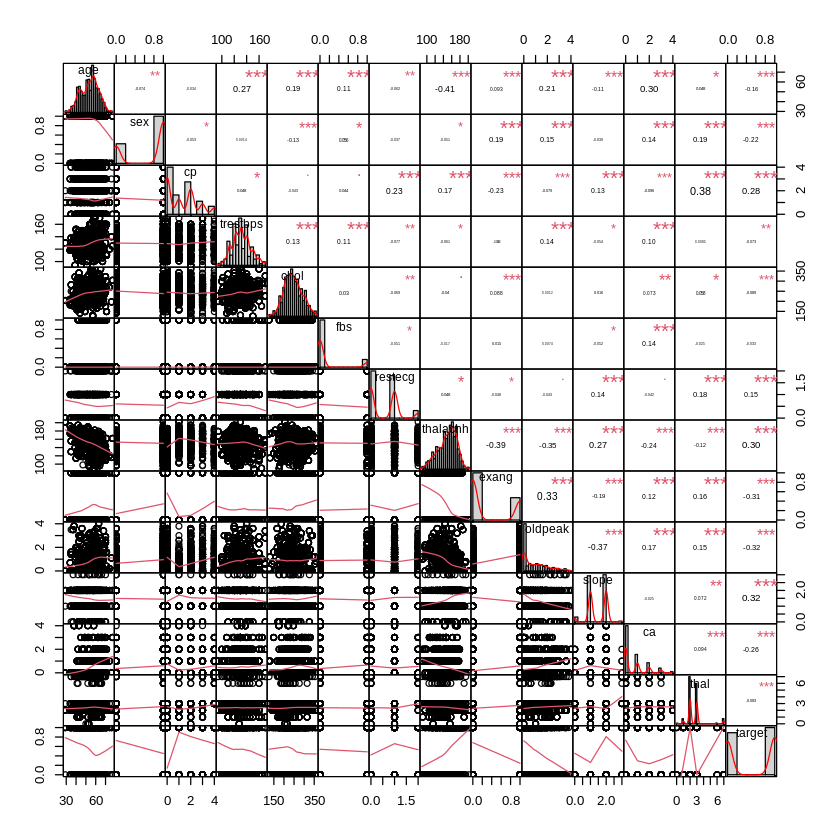

In [102]:
PerformanceAnalytics::chart.Correlation(TB_PP,histogram = TRUE, pch = 19)

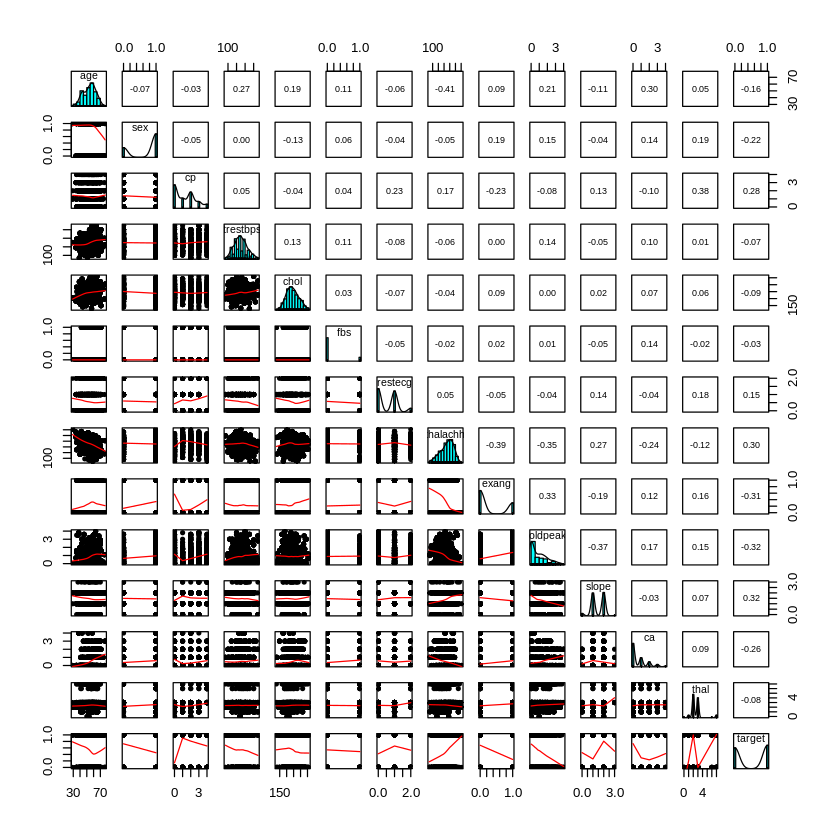

In [103]:
pairs.panels(TB_PP, method = "pearson", density = TRUE, ellipses = FALSE)

In [106]:
#연속형만 선택.
TB_PP %>%
  select(age, trestbps, chol, thalachh, oldpeak,target) %>%
    cor() %>% round(4)

,age,trestbps,chol,thalachh,oldpeak,target
age,1.0000,0.2683,0.1895,-0.4082,0.2086,-0.1621
trestbps,0.2683,1.0000,0.1260,-0.0609,0.1359,-0.0729
chol,0.1895,0.1260,1.0000,-0.0396,0.0012,-0.0893
thalachh,-0.4082,-0.0609,-0.0396,1.0000,-0.3492,0.2997
oldpeak,0.2086,0.1359,0.0012,-0.3492,1.0000,-0.3199
target,-0.1621,-0.0729,-0.0893,0.2997,-0.3199,1.0000


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


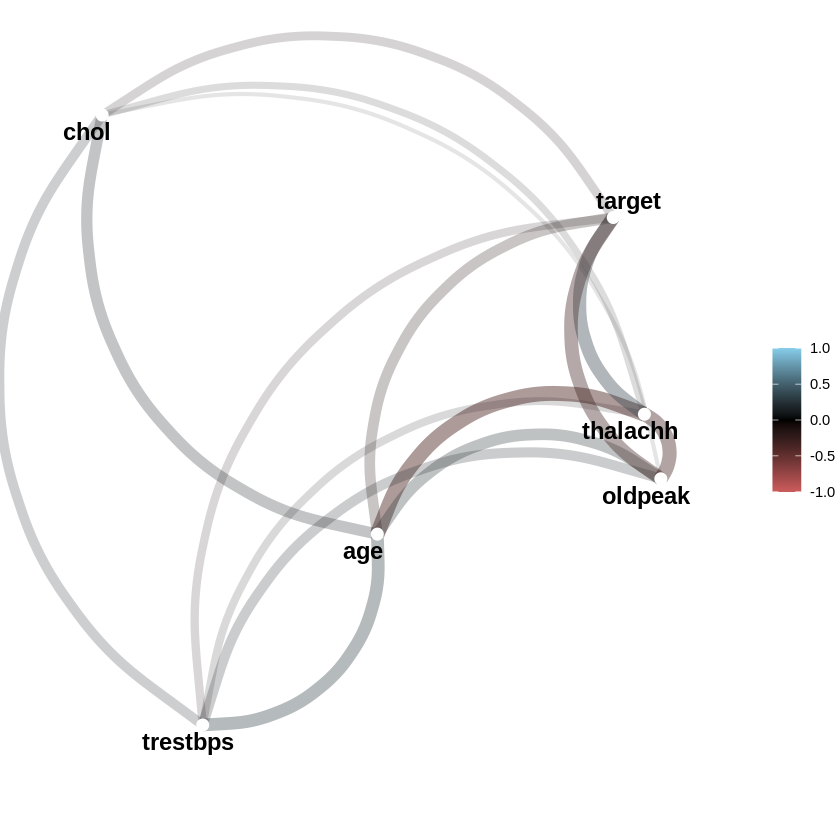

In [107]:
TB_PP %>%
  select(age, trestbps, chol, thalachh, oldpeak,target) %>%
  corrr::correlate() %>%
  corrr::network_plot(min_cor=0, colours=c("indianred", "black", "skyblue"))

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

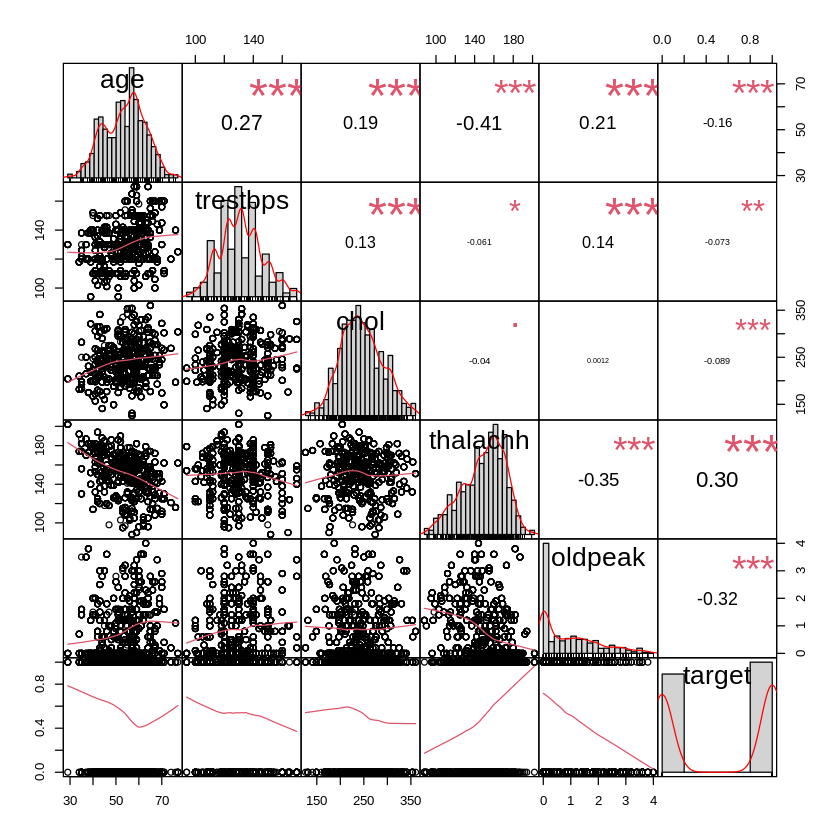

In [108]:
PerformanceAnalytics::chart.Correlation(TB_PP %>%
  select(age, trestbps, chol, thalachh, oldpeak,target),
  histogram = TRUE, pch = 19)

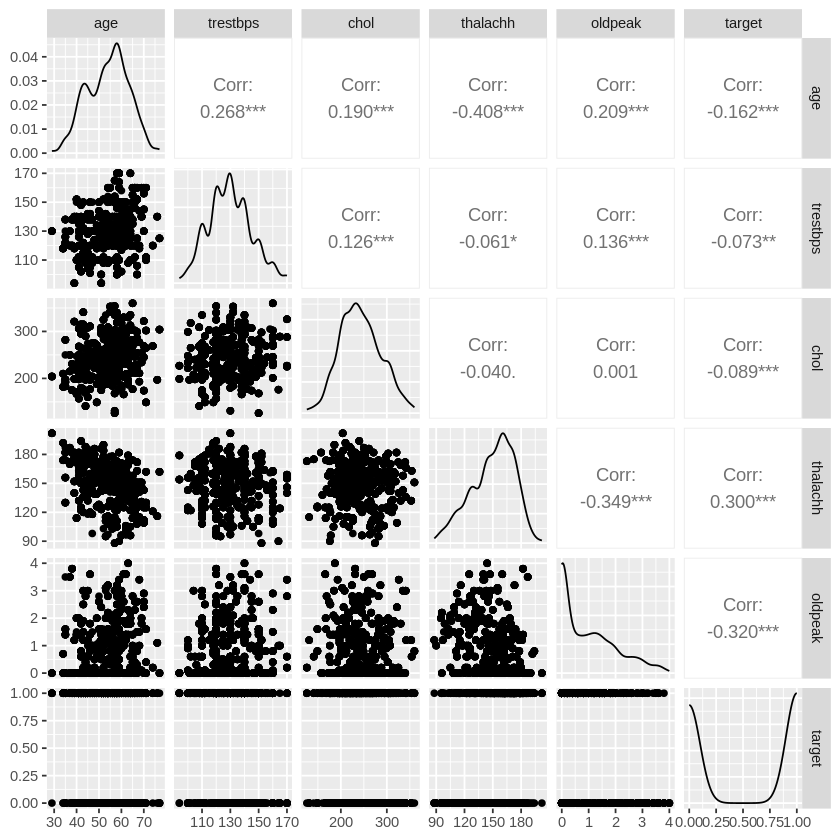

In [109]:
ggpairs(TB_PP %>% select(age, trestbps, chol, thalachh, oldpeak,target))

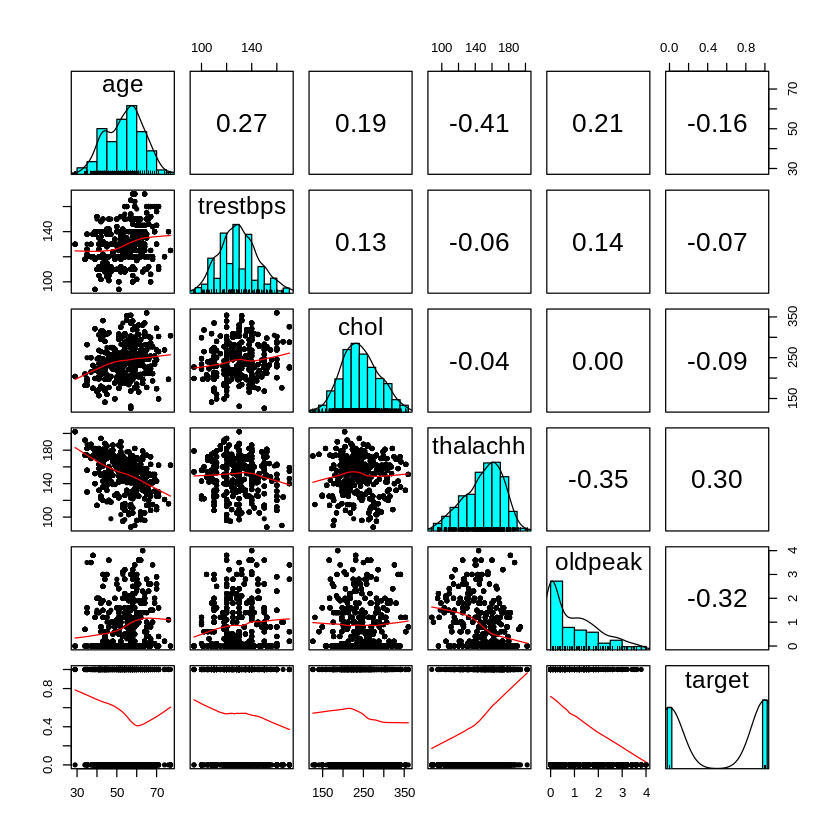

In [110]:
pairs.panels(TB_PP %>%
  select(age, trestbps, chol, thalachh, oldpeak,target),
  method = "pearson", density = TRUE, ellipses = FALSE)